## Load the dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

# load and preprocess the dataset
def load_and_preprocess_dataset(filepath):
    # load the dataset assuming it is comma-separated
    dataset = pd.read_csv(filepath)  # removed sep parameter to default to comma separation
    
    # extract features (X) and target variable (y) from the dataset
    X = dataset.iloc[:, :-1].values  
    y = dataset.iloc[:, -1].values  

    # initialize a StandardScaler to standardize the features
    scaler = StandardScaler()
    
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y


X, y = load_and_preprocess_dataset('../Normalization/UCI_Real_Estate_normalized.csv')


## Splitting the dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cross-Validation and Model Training

In [8]:
kf = KFold(n_splits=5)
cv_errors = []

# counter for the current fold
fold = 1

# iterates over each train-test split
for train_index, val_index in kf.split(X_train):
    # splitting the data into training and validation sets for the current fold
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    # logging the size of each split for verification
    print(f"Fold {fold}: Training on {len(train_index)} samples, validating on {len(val_index)} samples.")

    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)

    print(f'Fold {fold} - Coefficients: {model.coef_}')
    print(f'Fold {fold} - Intercept: {model.intercept_}')

    # makes predictions on the validation subset
    y_val_pred = model.predict(X_val_cv)

    error = mean_absolute_percentage_error(y_val_cv, y_val_pred)
    cv_errors.append(error)

    print(f'Fold {fold} - Cross-Validation MAPE: {error * 100:.2f}%\n')

    fold += 1

# calculating the average MAPE across all folds
average_cv_error = np.mean(cv_errors)

# logging the average MAPE for all folds
print(f'Average Cross-Validation MAPE across all folds: {average_cv_error * 100:.2f}%')


Fold 1: Training on 264 samples, validating on 67 samples.
Fold 1 - Coefficients: [-0.74625537  1.64327464 -2.72927982 -6.91448093  3.15089768  2.95135449
 -1.15654973]
Fold 1 - Intercept: 38.072544599951755
Fold 1 - Cross-Validation MAPE: 24.28%

Fold 2: Training on 265 samples, validating on 66 samples.
Fold 2 - Coefficients: [-1.15450461  1.31623528 -3.46606541 -6.04787713  3.09312188  2.72835273
 -0.19797384]
Fold 2 - Intercept: 37.62713779603486
Fold 2 - Cross-Validation MAPE: 17.96%

Fold 3: Training on 265 samples, validating on 66 samples.
Fold 3 - Coefficients: [-0.43576841  1.57280394 -3.09060359 -5.63080421  3.39255759  3.16355271
 -0.36816731]
Fold 3 - Intercept: 38.1926340674602
Fold 3 - Cross-Validation MAPE: 16.69%

Fold 4: Training on 265 samples, validating on 66 samples.
Fold 4 - Coefficients: [-0.43603146  1.53059876 -3.08812229 -6.45728822  2.51700396  2.61454717
 -0.4888578 ]
Fold 4 - Intercept: 38.25438733185872
Fold 4 - Cross-Validation MAPE: 20.33%

Fold 5: Trai

## Final Model Training and Evaluation

In [9]:
model_final = LinearRegression()
model_final.fit(X_train, y_train)

print(f'Final Model Coefficients: {model_final.coef_}')
print(f'Final Model Intercept: {model_final.intercept_}')

y_pred_test = model_final.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Test MAPE: {test_mape * 100:.2f}%')


Final Model Coefficients: [-0.67131952  1.52375728 -3.04756927 -6.07032248  3.18085587  2.80199067
 -0.46194899]
Final Model Intercept: 37.98025650169918
Test MAPE: 17.69%


## Visualization of Predictions

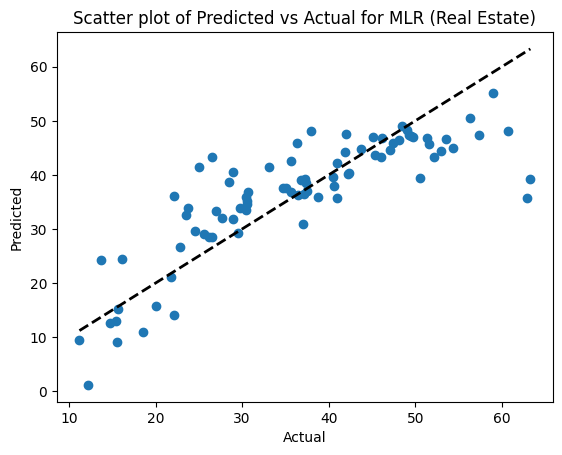

In [10]:
plt.scatter(y_test, y_pred_test)
plt.title('Scatter plot of Predicted vs Actual for MLR (Real Estate)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # diagonal line
plt.show()
